<a href="https://colab.research.google.com/github/haskiindahouse/it-school-first-semestr/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание

1) Исследовать зависимость количества скачиваний программного продукта от количества посещений сайта. (на основе данных из [4]).
В процессе решения задачи:
- вывести математические формулы для поиска коэффициентов для построении линии регрессии;
- написать функции для вычисления среднего значения, дисперсии, коэффициента корреляции;
- реализовать метод наименьших квадратов.
2) Освоение возможностей библиотеки matplotlib [3]: построение линейных графиков 

In [12]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from math import sqrt

In [9]:
t = np.arange(5, 15)
views = np.array([5252, 7620, 941, 1159, 485, 299, 239, 195, 181, 180])
regs = np.array([21, 46, 9, 8, 3, 6, 4, 2, 2, 2])
regViews100 = np.array([regs[i] / views[i] * 100 for i in range(len(views))])
print(regViews100)
sumRegs = sum(regs)
sumViews = sum(views)
print("sumRegs = " + str(sumRegs))
print("sumViews = " + str(sumViews))
print("sumRegs / sumViews * 100 = " + str(sumRegs / sumViews * 100))

[0.39984768 0.60367454 0.95642933 0.69025022 0.6185567  2.00668896
 1.67364017 1.02564103 1.10497238 1.11111111]
sumRegs = 103
sumViews = 16551
sumRegs / sumViews * 100 = 0.6223188931182405


In [10]:
def average(a):
  """
  Вычисление среднего в списке.
  """
  return sum(a) / len(a)

In [11]:
def dispersion(a):
  """
  Вычисление дисперсии в списке.
  """
  return sum([(el - average(a)) ** 2 for el in a]) / len(a)

In [13]:
def coefCorrelation(a, b):
  """
  Вычисление коэффициента корреляции между двумя списками.
  """
  return sum([(a[i] - average(a)) * (b[i] - average(b)) for i in range(len(a))]) / (len(a) * sqrt(dispersion(a) * dispersion(b)))

In [16]:
print("Коэффициент корреляции = " + str(coefCorrelation(views, regs)))

Коэффициент корреляции = 0.9694433977097228


Нужно найти коэффициенты A и B в уравнении:
A * x + B 

In [17]:
def helpFunc(a, b):
  """
  Для красоты.
  """
  return sum([a[i] * b[i] for i in range(len(a))]) / len(a)

In [18]:
def coefA(a, b):
  """
  Вычисление коэффициента A в линейной регрессии.
  """
  return (average(a) * average(b) - helpFunc(a, b)) / (average(a) ** 2 - helpFunc(a, a))


In [23]:
def coefB(a, b):
  """
  Вычисление коэффициента B в линейной регресии.
  """
  return average(b) - average(a) * coefA(a, b)

In [30]:
A = coefA(views, regs)
B = coefB(views, regs)
print("A = " + str(A))
print("B = " + str(B))

A = 0.005140311311538676
B = 1.7922707482723386


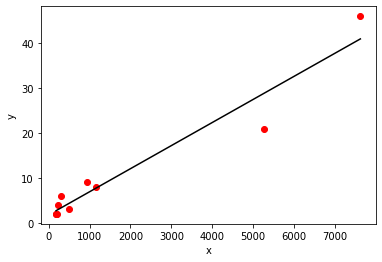

In [36]:
plt.scatter(views, regs, c='red')
xRange = np.arange(min(views), max(views))
plt.plot(xRange, np.array(xRange * A + B), c='black')
plt.xlabel("x")
plt.ylabel("y")
plt.show()